# Robyn: Marketing Mix Modeling Application

This notebook demonstrates the usage of Robyn, a Marketing Mix Modeling (MMM) application. We'll go through the main steps of initializing the model, running it, and performing budget allocation.



## 1. Import Required Libraries and Create Synthetic Data

First, let's import the necessary libraries and create some synthetic data for our demonstration.

In [1]:
import pandas as pd
import numpy as np
from robyn.robyn import Robyn
from robyn.data.entities.mmmdata import MMMData
from robyn.data.entities.holidays_data import HolidaysData
from robyn.data.entities.hyperparameters import Hyperparameters, ChannelHyperparameters
from robyn.data.entities.calibration_input import CalibrationInput, ChannelCalibrationData
from robyn.data.entities.enums import AdstockType, DependentVarType, CalibrationScope

/Users/sandeepmane/Documents/GitHub/Robyn/python/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2.1 Load simulated data.

You need to replace this with real data.

In [2]:
# Read the simulated data and holidays data
dt_simulated_weekly = pd.read_csv("resources/dt_simulated_weekly.csv")

print("Simulated Data...")
dt_simulated_weekly.head()

Simulated Data...


,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,22358.346667,0.0,12728.488889,2.430128e+07,0.000000,0.000000,8125009,7607.132915,na,19401.653846
1,2015-11-30,2.584277e+06,28613.453333,0.0,0.000000,5.527033e+06,9837.238486,4133.333333,7901549,1141.952450,na,14791.000000
2,2015-12-07,2.547387e+06,0.000000,132278.4,453.866667,1.665159e+07,12044.119653,3786.666667,8300197,4256.375378,na,14544.000000
3,2015-12-14,2.875220e+06,83450.306667,0.0,17680.000000,1.054977e+07,12268.070319,4253.333333,8122883,2800.490677,na,2800.000000
4,2015-12-21,2.215953e+06,0.000000,277336.0,0.000000,2.934090e+06,9467.248023,3613.333333,7105985,689.582605,na,15478.000000


In [3]:
dt_prophet_holidays = pd.read_csv("resources/dt_prophet_holidays.csv")

print("Holidays Data...")
dt_prophet_holidays.head()

Holidays Data...


,ds,holiday,country,year
0,1995-01-01,New Year's Day,AD,1995
1,1995-01-06,Epiphany,AD,1995
2,1995-02-28,Carnival,AD,1995
3,1995-03-14,Constitution Day,AD,1995
4,1995-04-14,Good Friday,AD,1995


## 2.2. Initialize Robyn

Now, let's initialize Robyn with our synthetic data and configuration.

In [4]:
# Initialize Robyn
robyn = Robyn(working_dir="~/temp/robyn")

# Create MMMData
mmm_data_spec = MMMData.MMMDataSpec(
    dep_var="revenue",
    dep_var_type="revenue",
    date_var="DATE",
    context_vars=["competitor_sales_B", "events"],
    paid_media_spends=["tv_S", "ooh_S", "print_S", "facebook_S", "search_S"],
    paid_media_vars=["tv_S", "ooh_S", "print_S", "facebook_I", "search_clicks_P"],
    organic_vars=["newsletter"],
    window_start="2016-01-01",
    window_end="2018-12-31",
)

mmm_data = MMMData(data=dt_simulated_weekly, mmmdata_spec=mmm_data_spec)

# Create HolidaysData (using dummy data for demonstration)
holidays_data = HolidaysData(
    dt_holidays=dt_prophet_holidays,
    prophet_vars=["trend", "season", "holiday"],
    prophet_country="DE",
    prophet_signs=["default", "default", "default"],
)

# Create Hyperparameters
hyperparameters = Hyperparameters(
    {
        "facebook_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0, 0.3],
        ),
        "print_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
        "tv_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.3, 0.8],
        ),
        "search_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0, 0.3],
        ),
        "ooh_S": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
        "newsletter": ChannelHyperparameters(
            alphas=[0.5, 3],
            gammas=[0.3, 1],
            thetas=[0.1, 0.4],
        ),
    },
    adstock=AdstockType.GEOMETRIC,
    lambda_=0.0,
    train_size=[0.5, 0.8],
)

# Create CalibrationInput (using dummy data for demonstration)
# calibration_input = CalibrationInput({
#     "tv_spend": ChannelCalibrationData(
#         lift_start_date=pd.Timestamp("2022-03-01"),
#         lift_end_date=pd.Timestamp("2022-03-15"),
#         lift_abs=10000,
#         spend=50000,
#         confidence=0.9,
#         metric="revenue",
#         calibration_scope=CalibrationScope.IMMEDIATE
#     )
# })

# Initialize Robyn
robyn.initialize(
    mmm_data=mmm_data,
    holidays_data=holidays_data,
    hyperparameters=hyperparameters,
    calibration_input=None,
)

print("Robyn initialized successfully!")

2024-10-21 22:45:06 - root - INFO - Robyn initialized with working directory: ~/temp/robyn


Validation complete
Robyn initialized successfully!


## 3. Run Robyn Model

After initialization, we can run the Robyn model.

22:45:07 - cmdstanpy - INFO - Chain [1] start processing
2024-10-21 22:45:07 - cmdstanpy - INFO - Chain [1] start processing
22:45:08 - cmdstanpy - INFO - Chain [1] done processing
2024-10-21 22:45:08 - cmdstanpy - INFO - Chain [1] done processing
2024-10-21 22:45:08 - robyn.modeling.feature_engineering - INFO - Prophet decomposition complete.
2024-10-21 22:45:08 - robyn.modeling.feature_engineering - INFO - Processing tv_S
2024-10-21 22:45:08 - robyn.modeling.feature_engineering - INFO - Processing ooh_S
2024-10-21 22:45:09 - robyn.modeling.feature_engineering - INFO - Processing print_S
2024-10-21 22:45:09 - robyn.modeling.feature_engineering - INFO - Processing facebook_S
2024-10-21 22:45:09 - robyn.modeling.feature_engineering - INFO - Processing search_S
2024-10-21 22:45:09 - robyn.modeling.feature_engineering - INFO - Feature engineering complete.


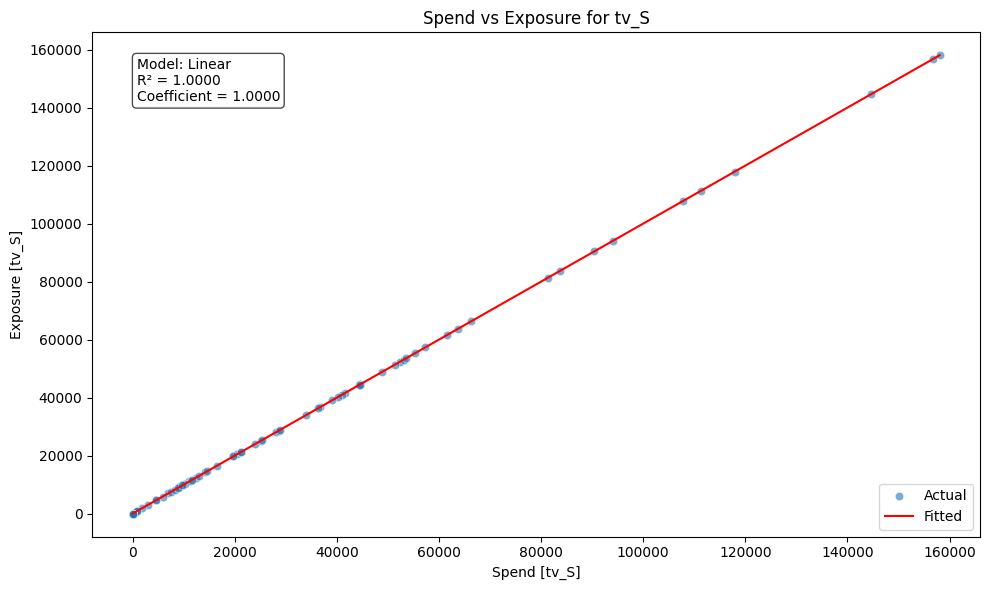

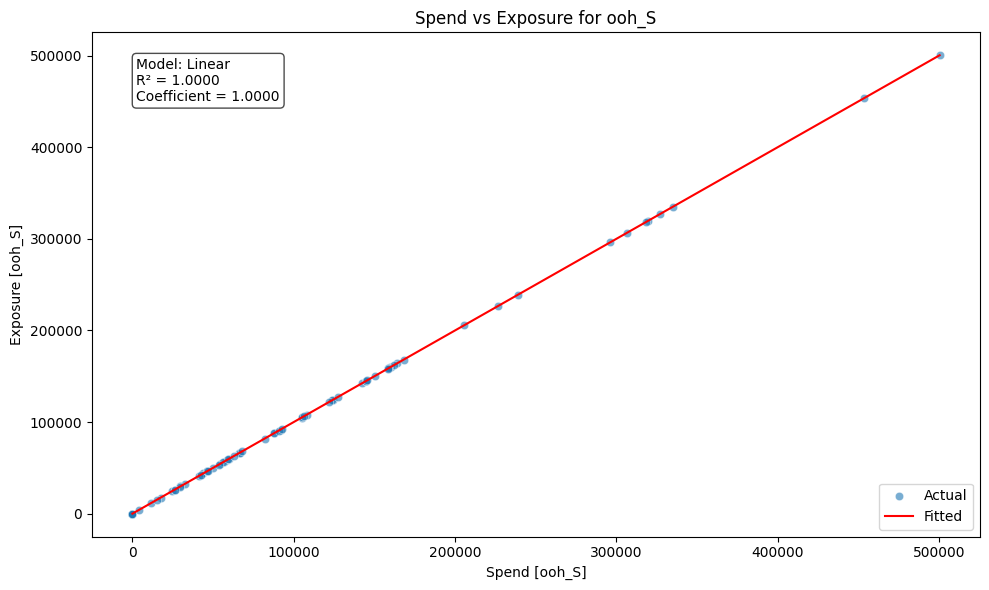

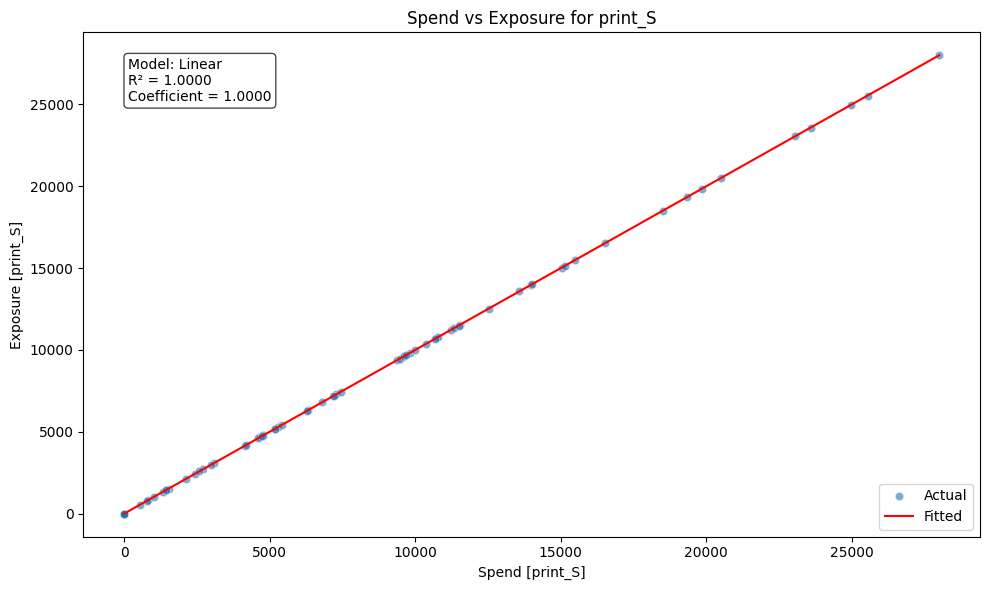

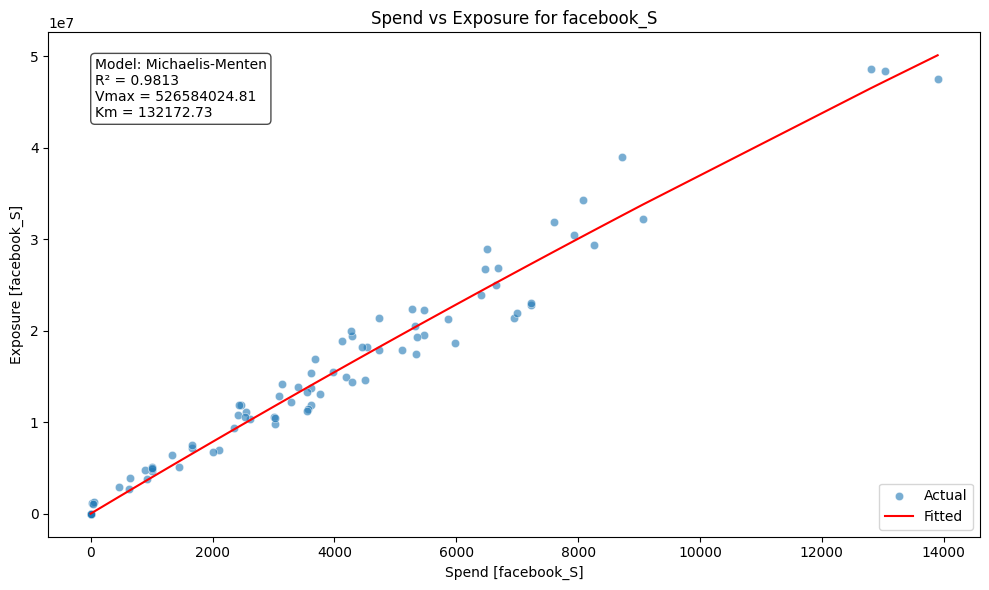

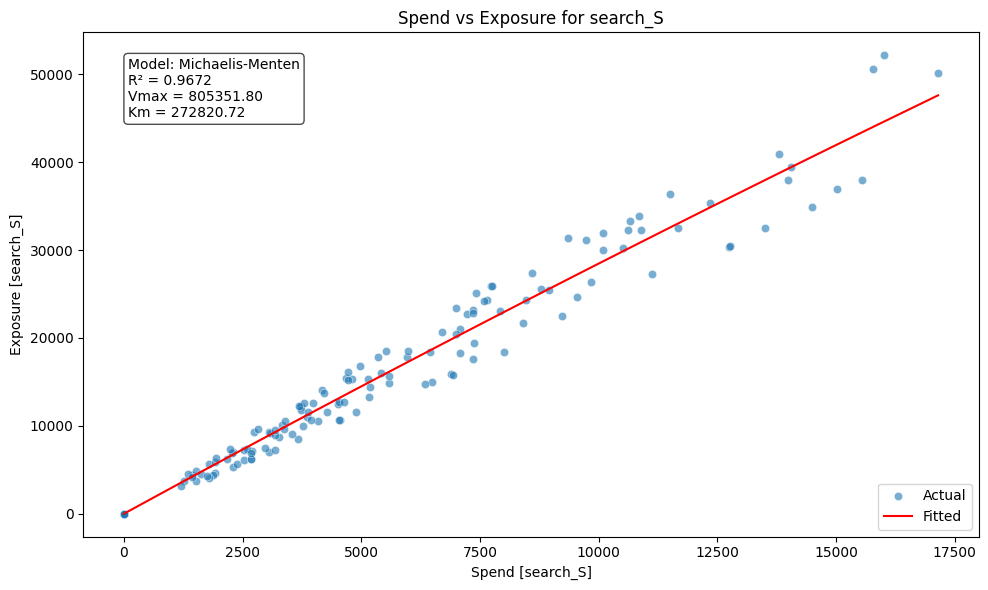

2024-10-21 22:45:11 - robyn.modeling.ridge_model_builder - INFO - Input data has 208 weeks in total: 2015-11-23 to 2019-11-11
2024-10-21 22:45:11 - robyn.modeling.ridge_model_builder - INFO - Initial model is built on rolling window of 157 weeks: 2016-01-01 to 2018-12-31
2024-10-21 22:45:11 - robyn.modeling.ridge_model_builder - INFO - Collecting hyperparameters for optimization... {'prepared_hyperparameters': Hyperparameters(hyperparameters={'facebook_S': ChannelHyperparameters(thetas=[0, 0.3], shapes=None, scales=None, alphas=[0.5, 3], gammas=[0.3, 1], penalty=None), 'print_S': ChannelHyperparameters(thetas=[0.1, 0.4], shapes=None, scales=None, alphas=[0.5, 3], gammas=[0.3, 1], penalty=None), 'tv_S': ChannelHyperparameters(thetas=[0.3, 0.8], shapes=None, scales=None, alphas=[0.5, 3], gammas=[0.3, 1], penalty=None), 'search_S': ChannelHyperparameters(thetas=[0, 0.3], shapes=None, scales=None, alphas=[0.5, 3], gammas=[0.3, 1], penalty=None), 'ooh_S': ChannelHyperparameters(thetas=[0.1,

>>> Starting 5 trials with 2000 iterations each using TwoPointsDE nevergrad algorithm on x cores...


Running trial 1 of total 5 trials: 100%|███████████████████████████████████
2024-10-21 22:46:42 - robyn.modeling.ridge_model_builder - INFO -  Finished in 1.53 mins
Running trial 2 of total 5 trials: 100%|███████████████████████████████████
2024-10-21 22:48:13 - robyn.modeling.ridge_model_builder - INFO -  Finished in 1.51 mins
Running trial 3 of total 5 trials: 100%|███████████████████████████████████
2024-10-21 22:49:46 - robyn.modeling.ridge_model_builder - INFO -  Finished in 1.54 mins
Running trial 4 of total 5 trials: 100%|███████████████████████████████████
2024-10-21 22:51:18 - robyn.modeling.ridge_model_builder - INFO -  Finished in 1.52 mins
Running trial 5 of total 5 trials: 100%|███████████████████████████████████
2024-10-21 22:52:50 - robyn.modeling.ridge_model_builder - INFO -  Finished in 1.52 mins
2024-10-21 22:52:51 - robyn.modeling.ridge_model_builder - INFO - Total run time: 7.68 mins
2024-10-21 22:52:51 - robyn.modeling.convergence.convergence - WARNING - 'mape' col

Model training complete.


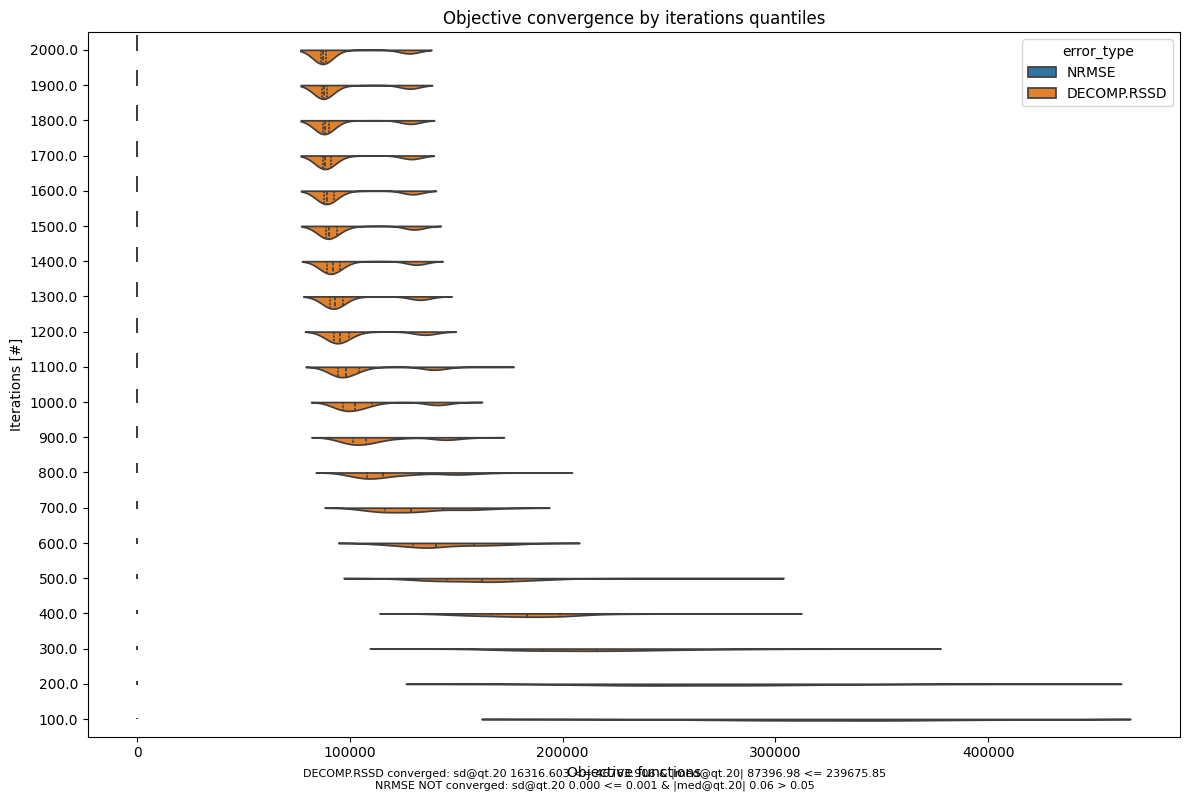

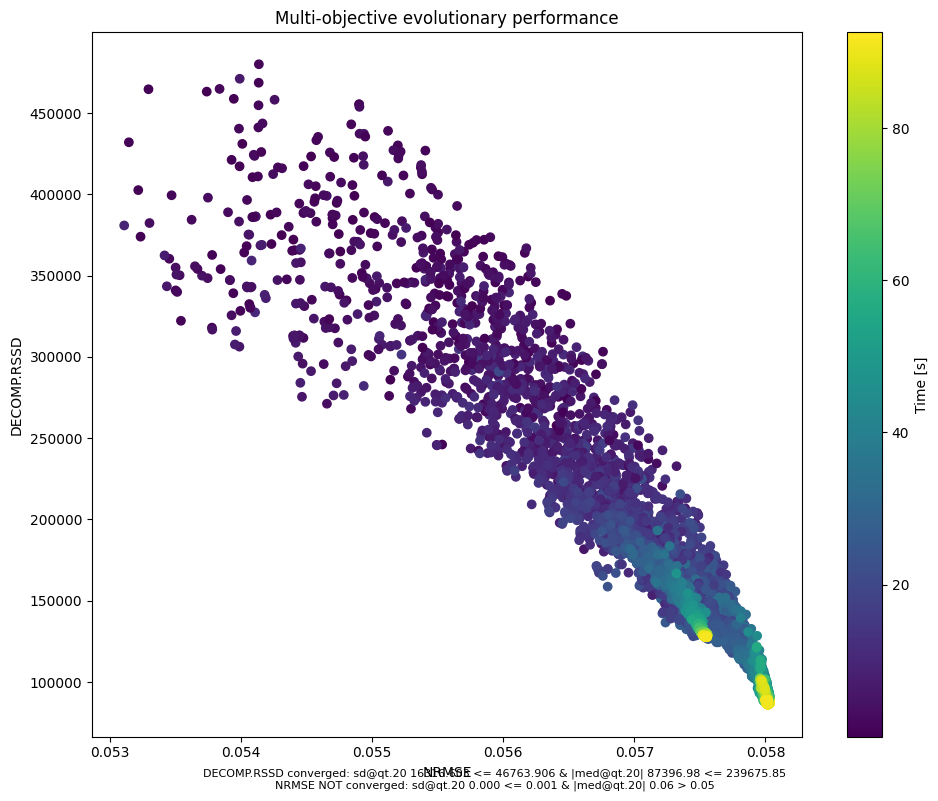

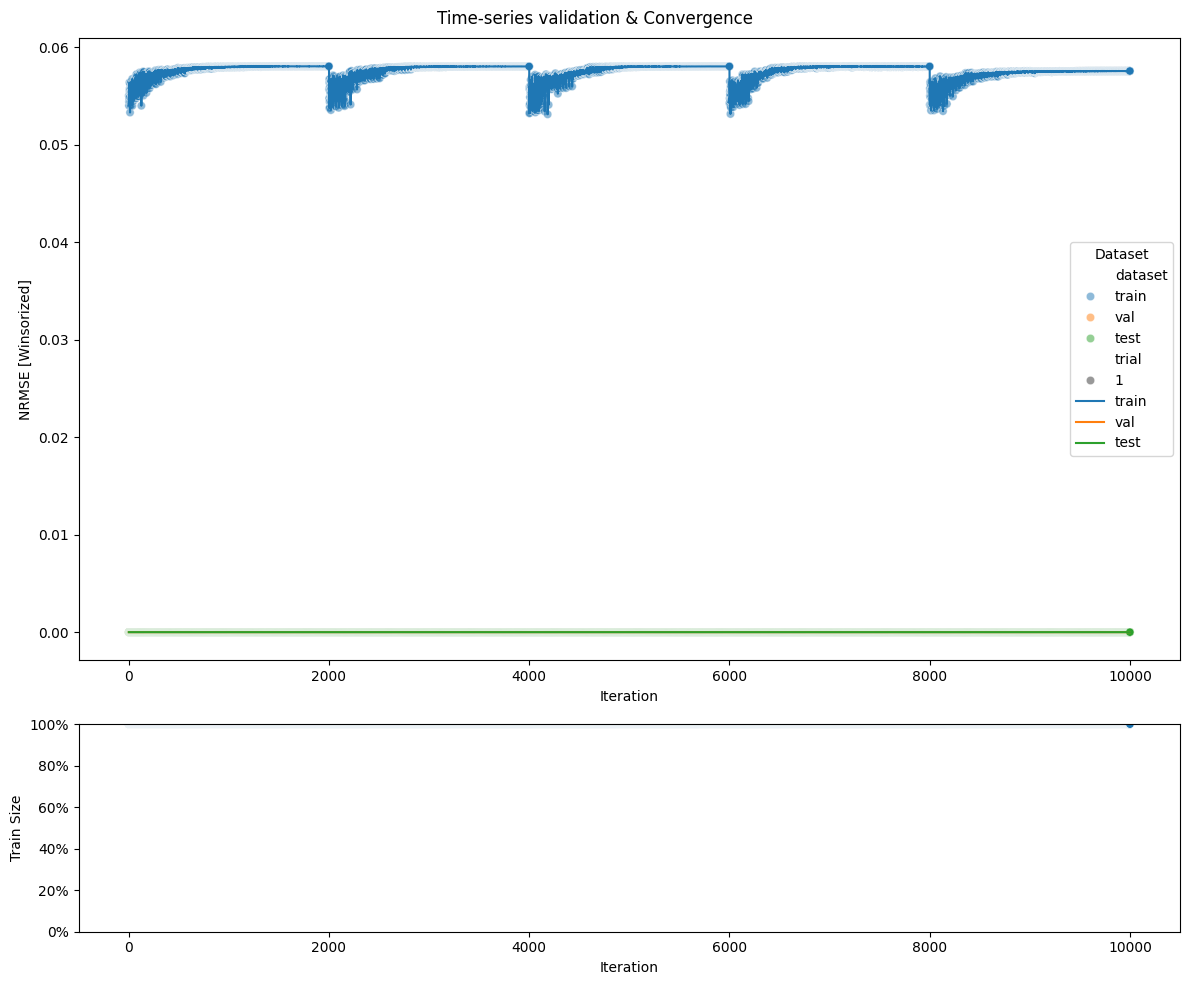

In [5]:
from robyn.modeling.entities.modelrun_trials_config import TrialsConfig


trials_config = TrialsConfig(iterations=2000, trials=5)

# Run the model
robyn.model_run(feature_plots=True, trials_config=trials_config)

## 4. Budget Allocation

Finally, let's perform budget allocation using the trained model.

This notebook demonstrates the basic workflow of using Robyn for Marketing Mix Modeling. In a real-world scenario, you would need to replace the synthetic data with your actual marketing data and adjust the parameters accordingly.

Remember to explore the full capabilities of Robyn, including model evaluation, visualization, and interpretation of results, which are beyond the scope of this basic demonstration.